In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
!pip install quandl
import quandl
!pip install sklearn
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

In [2]:
quandl.ApiConfig.api_key = "VzeyLzQBawyjqee5VXLv"

In [3]:
df = quandl.get("EOD/AAPL")
df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0


In [4]:
(df[['Split']]!=1).value_counts()

Split
False    1089
True        1
dtype: int64

In [5]:
df.loc[df['Split']!=1]

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2014-06-09,92.7,93.88,91.75,93.7,75414997.0,0.0,7.0,20.914601,21.180828,20.700266,21.140217,301659988.0


In [6]:
(df[['Dividend']]!=0).value_counts()

Dividend
False       1073
True          17
dtype: int64

In [7]:
df.loc[df['Dividend']!=0]

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-11-06,524.15,524.860,518.200,520.92,7977700.0,3.05,1.0,16.700415,16.723037,16.510837,16.597501,223375600.0
2014-02-06,510.06,513.500,507.810,512.51,9205900.0,3.05,1.0,16.348195,16.458453,16.276080,16.426722,257765200.0
2014-05-08,588.25,594.410,586.400,587.99,8224900.0,3.29,1.0,18.959800,19.158342,18.900172,18.951419,230297200.0
2014-08-07,94.93,95.950,94.100,94.48,46711000.0,0.47,1.0,21.524269,21.755542,21.336076,21.422237,186844000.0
2014-11-06,108.60,108.790,107.800,108.70,34968457.0,0.47,1.0,24.730251,24.773517,24.548076,24.753023,139873828.0
2015-02-05,120.02,120.230,119.250,119.94,42246245.0,0.47,1.0,27.437898,27.485906,27.261867,27.419609,168984980.0
2015-05-07,124.77,126.080,124.020,125.26,43940895.0,0.52,1.0,28.642213,28.942936,28.470043,28.754697,175763580.0
2015-08-06,115.97,116.500,114.115,115.13,52903040.0,0.52,1.0,26.742326,26.864542,26.314569,26.548625,211612160.0
2015-11-05,121.85,122.690,120.180,120.92,39552680.0,0.52,1.0,28.219069,28.413603,27.832316,28.003691,158210720.0


In [8]:
df['HL_PCT'] = (df['Adj_High'] - df['Adj_Low']) / df['Adj_Close'] * 100

In [9]:
df['PCT_change'] = (df['Adj_Close'] - df['Adj_Open']) / df['Adj_Open'] * 100

In [10]:
df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0,2.711941,-0.916650
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0,1.195129,-0.173953
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683


<AxesSubplot:>

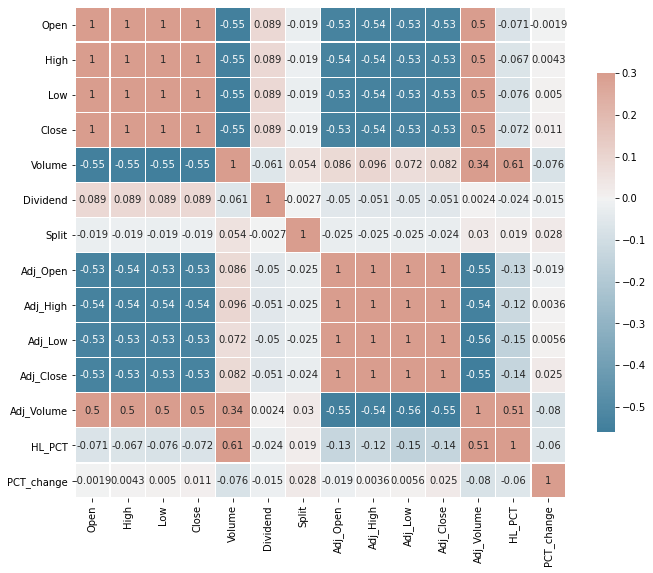

In [11]:
corrMatrix = df.corr()

f,ax = plt.subplots(figsize=(11,11))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(corrMatrix,cmap=cmap ,vmax=.3, annot=True, center=0, square=True, linewidths=0.2,cbar_kws={"shrink": .6} )

In [12]:
df2 = df[["Adj_Close","Adj_Volume","HL_PCT","PCT_change"]]

In [13]:
df2.head()

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,
2013-09-03,15.476472,331928800.0,2.711941,-0.916650
2013-09-04,15.796753,345032800.0,1.195129,-0.173953
2013-09-05,15.688388,236367600.0,1.421447,-0.995502
2013-09-06,15.781833,359525600.0,1.892738,-0.044138
2013-09-09,16.033661,340687200.0,0.877176,0.231683


<AxesSubplot:xlabel='Date'>

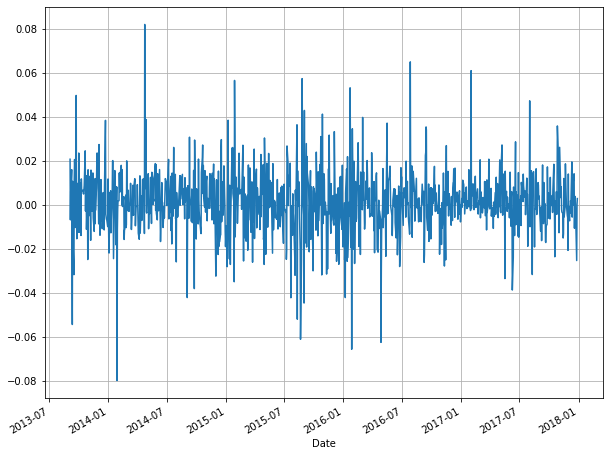

In [14]:
df2['Adj_Close'].pct_change().plot(figsize=(10,8),grid=True)

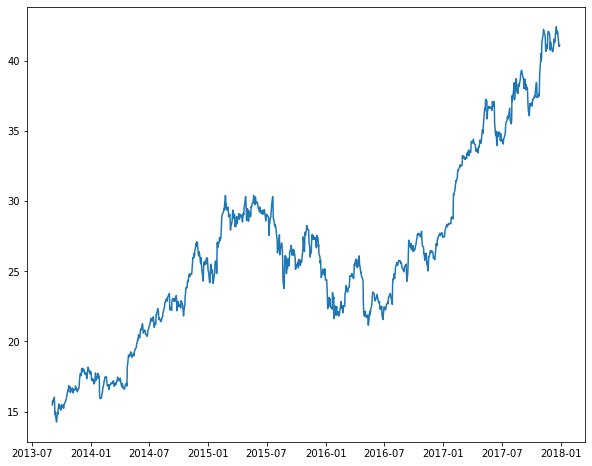

In [15]:
#plot colse price
plt.figure(figsize=(10,8))
plt.plot(df2['Adj_Close'])

In [16]:
print('Shape of df2: ', df2.shape)

label=df2["Adj_Close"].shift(-10)

print("Label having total null: ", label.isna().sum())

print("Shape of Label: ", label.shape, " This includes Null Values")

label.dropna(inplace=True)
y= np.array(label)
y.shape

Shape of df2:  (1090, 4)
Label having total null:  10
Shape of Label:  (1090,)  This includes Null Values


(1080,)

In [17]:
x=df2[["Adj_Volume" , "HL_PCT" , "PCT_change"]]
x.shape

(1090, 3)

In [18]:
X_lately=x[-10:]

x = x[:-10]
X_lately.shape

(10, 3)

In [19]:
x.shape

(1080, 3)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state =2)
norm = MinMaxScaler().fit(X_train)
X_train=norm.transform(X_train)
X_test=norm.transform(X_test)
X_lately = norm.transform(X_lately)

In [21]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
score=reg.score(X_test,Y_test)

In [22]:
reg.intercept_

30.75372223600386

In [23]:
reg.coef_

array([-33.32286783,  24.19958289,  -1.53864965])

In [24]:
forecast=[]
forecast=reg.predict(X_lately)
Y_pred= reg.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred)



In [25]:
mse

27.42845072650933

In [26]:
Y_pred

array([20.1128987 , 29.51362763, 29.66369571, 27.25172991, 27.49568199,
       28.9673309 , 28.7222891 , 29.70476333, 28.78915447, 27.28615783,
       28.19893224, 29.69028781, 25.29727348, 21.15657618, 20.13370776,
       24.86836802, 29.39976285, 28.57629334, 27.50380437, 33.57494957,
       29.55249838, 26.92580527, 30.12303457, 28.55888938, 28.24748622,
       24.97124027, 28.67269584, 27.50247064, 27.36458776, 27.51316607,
       25.34754829, 29.21985975, 29.23922198, 28.7885536 , 26.3974436 ,
       18.56113476, 28.02808195, 29.3397774 , 31.11973342, 26.12678094,
       25.58757654, 28.82145359, 27.72288762, 20.96662892, 30.59612048,
       28.30765127, 28.69761545, 29.44189063, 28.26683759, 30.52537634,
       20.03419215, 29.630868  , 29.58005459, 24.94823744, 28.59450591,
       30.68876673, 27.63686401, 29.39744473, 24.60469004, 26.05710498,
       27.01331863, 28.70327541, 22.55379105, 28.39335734, 19.94122313,
       29.67040905, 29.02566897, 27.68008113, 24.00482447, 28.51

In [27]:
forecast

array([29.65515074, 26.70472351, 28.85707334, 28.39915127, 29.78912457,
       29.88439252, 29.77139446, 27.94282092, 29.09948166, 30.18147504])

In [28]:
score

0.30710187989433135